In [3]:
import tensorflow as tf
import shutil
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

IMAGE_SIZE = (240,640)

# Funções auxiliares

In [6]:
def get_dataset(directory, shuffle, batch_size, color_mode):
    dataset = tf.keras.utils.image_dataset_from_directory(
    directory,
    seed=123,
    color_mode=color_mode,
    image_size=IMAGE_SIZE,
    label_mode='categorical',
    batch_size=batch_size,
    shuffle=shuffle)

    return dataset

In [3]:
def delete_folder(folder_path):
    shutil.rmtree(folder_path)
    print("Folder deleted successfully!")

def copy_items(source_folder, destination_folder, regex_pattern):
    # Check if the source folder exists
    if not os.path.exists(source_folder):
        print("{} folder does not exist.".format(source_folder))
        return
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Get a list of all items in the source folder
    items = os.listdir(source_folder)
    print(len(items))

    # Iterate over each item
    for i in range(len(items)):
        #  Get the file at index i
        item = items[i]
        # Check if the item matches the regular expression pattern
        if re.match(regex_pattern, item):
            # Get the full path of the item
            item_path = os.path.join(source_folder, item)

            # Move the item to the destination folder
            shutil.copy2(item_path, destination_folder)
                
    print("{} was copied.".format(source_folder))

    # Set the source folder, destination folder, and regular expression pattern
    source_folder = "D:\\BackupProtocoloRecolha\\01"

def create_dataset(type_of_save, ids_to_copy):
    clique_folder = f"C:\\{type_of_save}\\clique"
    mouse_folder = f"C:\\{type_of_save}\\mouse"
    mover_folder = f"C:\\{type_of_save}\\mover"
    rodar_folder = f"C:\\{type_of_save}\\rodar"
    zoomin_folder = f"C:\\{type_of_save}\\zoomin"
    zoomout_folder = f"C:\\{type_of_save}\\zoomout"

    for x in ids_to_copy:
        if x < 10:
            source_folder = "D:\\BackupProtocoloRecolha\\0{}".format(x)
        else:
            source_folder = "D:\\BackupProtocoloRecolha\\{}".format(x)

        for i in range(13):
            regex_pattern = r"^({})-.*\.png".format(i)
            if i == 0:
                destination_folder = clique_folder
            elif i == 1:
                destination_folder = mover_folder
            elif i == 2:
                destination_folder = rodar_folder
            elif i == 3:
                destination_folder = zoomin_folder
            elif i == 4:
                destination_folder = zoomout_folder
            elif i == 5:
                destination_folder = mouse_folder
            elif i == 7:
                destination_folder = clique_folder
            elif i == 8:
                destination_folder = mover_folder
            elif i == 9:
                destination_folder = rodar_folder
            elif i == 10:
                destination_folder = zoomin_folder
            elif i == 11:
                destination_folder = zoomout_folder
            elif i == 12:
                destination_folder = mouse_folder
                # Call the move_items function with the provided parameters
            if i != 6:
                copy_items(source_folder, destination_folder, regex_pattern)

# Dados de teste

## Voluntários únicos - 21

[3, 6, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24]

Teste - 20% * 21 = 4.2 (arredonda 4)

Validação - 15% * (21-4) = 2.55 (arredonda 3)

Treino - 15

### Dados de teste

In [6]:
test_index = [10, 8, 11, 16]

create_dataset("testing", [10,8,11,16])

15828
D:\BackupProtocoloRecolha\10 was copied.
15828
D:\BackupProtocoloRecolha\10 was copied.
15828
D:\BackupProtocoloRecolha\10 was copied.
15828
D:\BackupProtocoloRecolha\10 was copied.
15828
D:\BackupProtocoloRecolha\10 was copied.
15828
D:\BackupProtocoloRecolha\10 was copied.
15828
D:\BackupProtocoloRecolha\10 was copied.
15828
D:\BackupProtocoloRecolha\10 was copied.
15828
D:\BackupProtocoloRecolha\10 was copied.
15828
D:\BackupProtocoloRecolha\10 was copied.
15828
D:\BackupProtocoloRecolha\10 was copied.
15828
D:\BackupProtocoloRecolha\10 was copied.
16305
D:\BackupProtocoloRecolha\08 was copied.
16305
D:\BackupProtocoloRecolha\08 was copied.
16305
D:\BackupProtocoloRecolha\08 was copied.
16305
D:\BackupProtocoloRecolha\08 was copied.
16305
D:\BackupProtocoloRecolha\08 was copied.
16305
D:\BackupProtocoloRecolha\08 was copied.
16305
D:\BackupProtocoloRecolha\08 was copied.
16305
D:\BackupProtocoloRecolha\08 was copied.
16305
D:\BackupProtocoloRecolha\08 was copied.
16305
D:\Back

## Folds de validação

In [7]:
val_folds = [
    [5, 13, 18],
    [3, 8, 20],
    [11, 12, 13],
    [4, 22, 7],
    [24, 9, 5],
    [23, 19, 15],
    [4, 12, 22],
    [6, 13, 24],
    [9, 18, 20]
    ]


# CNN Archi

In [4]:
def cnn_model(img_height, img_width, channels):

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)))
    model.add(tf.keras.layers.Conv2D(filters=14, kernel_size=(5, 5), activation='relu'))
    model.add(tf.keras.layers.AveragePooling2D())
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Conv2D(filters=14, kernel_size=(5, 5), activation='relu'))
    model.add(tf.keras.layers.AveragePooling2D())
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Conv2D(filters=14, kernel_size=(5, 5), activation='relu'))
    model.add(tf.keras.layers.AveragePooling2D())
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Conv2D(filters=14, kernel_size=(5, 5), activation='relu'))
    model.add(tf.keras.layers.AveragePooling2D())
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(6, activation='softmax'))


    opt = tf.keras.optimizers.Adam(lr=0.0001)
    model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=[ 'accuracy'])
    return model

def prepare_callbacks(directory):
    checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=directory,
                               monitor = 'val_accuracy',
                               verbose=1,
                               save_weights_only=True,
                               save_best_only=True)


    earlyStopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta = 0.0001, patience = 15, verbose = 1)

    reduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.000000001, verbose = 1)

    return [checkpointer, earlyStopper, reduceLR]

## Loop de treino

In [ ]:
all_voluntairs = [3, 6, 4, 5, 7, 9, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24]
history_array_cnn1 = []
result_array_cnn1 = []
current_fold = 0
AUTOTUNE = tf.data.AUTOTUNE

# Get the test dataset
test_dataset = get_dataset("/home/birdlab/Documents/bruno-repo/testing", False, 32, "grayscale")

for fold in val_folds:
    # Crio o dataset de validação
    create_dataset("validation", fold)
    val_dataset = get_dataset("/home/birdlab/Documents/bruno-repo/validation", False, batch_size=32, color_mode="grayscale")
    
    # Determino os indices de treino
    train_index = [x for x in all_voluntairs if x not in fold]

    # Crio o dataset de treino
    create_dataset("training", train_index)
    train_dataset = get_dataset("/home/birdlab/Documents/bruno-repo/training", True, batch_size=32, color_mode="grayscale")
    
    # Instancio um modelo novo
    model = cnn_model(img_height=240, img_width=640, channels=1)

    # Preparo os callback do novo modelo
    callbacks = prepare_callbacks(f"cnn1/{current_fold}/test.ckpt")

    # Treino o modelo e guardo a historia num array
    history = model.fit(train_dataset, validation_data=val_dataset, epochs=20, callbacks=callbacks)
    history_array_cnn1.append(history)

    result = model.evaluate(test_dataset)
    result_array_cnn1.append(result)
    
    # Elimino as pastas criadas
    delete_folder("/home/birdlab/Documents/bruno-repo/validation")
    delete_folder("/home/birdlab/Documents/bruno-repo/training")

    current_fold += 1

## Resultado dos dados de teste para todos os modelos

In [10]:
test_dataset = get_dataset("C:\\testing", False, 32, "grayscale")

for i in range(9):
    model = cnn_model(240,640,1)

    model.load_weights(f"C:\\modelTraining\\pre-processing\\imageBased-torre\\cnn1\\{i}\\test.ckpt")

    model.evaluate(test_dataset)

c:\modelTraining\.venv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2018/2018 [==============================] - 111s 55ms/step - loss: 8.5428 - accuracy: 0.5278


## Matriz de confusão para um modelo em específico

Text(50.722222222222214, 0.5, 'True labels')

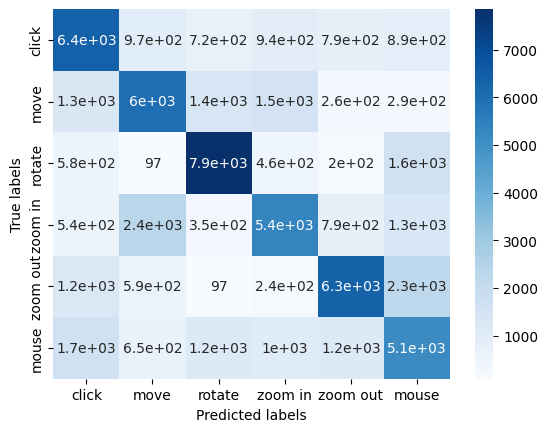

In [9]:
model = cnn_model(240,640,1)

test_dataset = get_dataset("C:\\testing", False, 32, "grayscale")

model.load_weights(f"C:\\modelTraining\\imageBased-torre\\cnn1\\6\\test.ckpt")

test_images = test_dataset.map(lambda x,y: x)
test_labels = test_dataset.map(lambda x,y: y)

predictions = model.predict(test_dataset)

true_labels = []
for _, labels in test_dataset:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())

true_labels = np.array(true_labels)
predicted_labels = np.argmax(predictions, axis=1)


cm = tf.math.confusion_matrix(true_labels, predicted_labels)

sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['click', 'move', 'rotate', 'zoom in', 'zoom out', 'mouse'], yticklabels= ['click', 'move', 'rotate', 'zoom in', 'zoom out', 'mouse'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

## Save do modelo

In [4]:
model = cnn_model(240,640,1)

model.load_weights(f"C:\\modelTraining\\imageBased-torre\\cnn1\\6\\test.ckpt")

model.save("protobuf-models/cnn1-fold6")

INFO:tensorflow:Assets written to: protobuf-models/cnn1-fold6\assets


INFO:tensorflow:Assets written to: protobuf-models/cnn1-fold6\assets


# CNN Archi 2

In [10]:
def cnn_model_2(img_height, img_width, channels):

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)))
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(6, activation='softmax'))


    opt = tf.keras.optimizers.Adam(lr=0.0001)
    model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=[ 'accuracy'])
    return model

def prepare_callbacks(directory):
    checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=directory,
                               monitor = 'val_accuracy',
                               verbose=1,
                               save_weights_only=True,
                               save_best_only=True)


    earlyStopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta = 0.0001, patience = 15, verbose = 1)

    reduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.000000001, verbose = 1)

    return [checkpointer, earlyStopper, reduceLR]

## Loop de treino

In [ ]:
all_voluntairs = [3, 6, 4, 5, 7, 9, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24]
history_array_cnn2 = []
result_array_cnn2 = []
current_fold = 0
AUTOTUNE = tf.data.AUTOTUNE

# Get the test dataset
test_dataset = get_dataset("/home/birdlab/Documents/bruno-repo/testing", False, 32, "grayscale")

for fold in val_folds:
    # Crio o dataset de validação
    create_dataset("validation", fold)
    val_dataset = get_dataset("/home/birdlab/Documents/bruno-repo/validation", False, batch_size=32, color_mode="grayscale")
    
    # Determino os indices de treino
    train_index = [x for x in all_voluntairs if x not in fold]

    # Crio o dataset de treino
    create_dataset("training", train_index)
    train_dataset = get_dataset("/home/birdlab/Documents/bruno-repo/training", True, batch_size=32, color_mode="grayscale")
    
    # Instancio um modelo novo
    model = cnn_model_2(img_height=240, img_width=640, channels=1)

    # Preparo os callback do novo modelo
    callbacks = prepare_callbacks(f"cnn2/{current_fold}/test.ckpt")

    # Treino o modelo e guardo a historia num array
    history = model.fit(train_dataset, validation_data=val_dataset, epochs=20, callbacks=callbacks)
    history_array_cnn2.append(history)

    result = model.evaluate(test_dataset)
    result_array_cnn2.append(result)
    
    # Elimino as pastas criadas
    delete_folder("/home/birdlab/Documents/bruno-repo/validation")
    delete_folder("/home/birdlab/Documents/bruno-repo/training")

    current_fold += 1

## Resultado dos dados de teste para todos os modelos

In [12]:
for i in range(9):
    model = cnn_model_2(240,640,1)

    model.load_weights(f"C:\\modelTraining\\pre-processing\\imageBased-torre\\cnn2\\{i}\\test.ckpt")

    model.evaluate(test_dataset)

2018/2018 [==============================] - 183s 91ms/step - loss: 9.4277 - accuracy: 0.3650


## Matriz de confusão para um modelo em específico

c:\modelTraining\.venv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Found 64566 files belonging to 6 classes.
2018/2018 [==============================] - 206s 101ms/step


Text(50.722222222222214, 0.5, 'True labels')

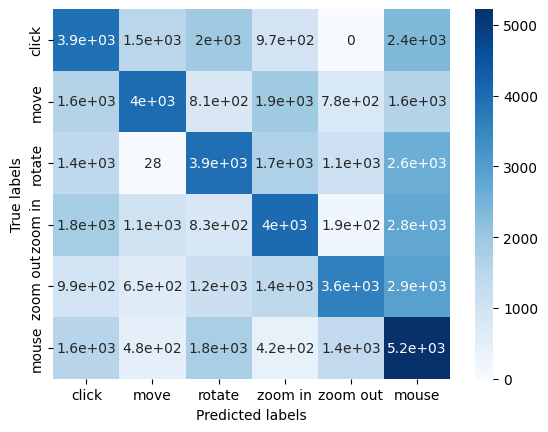

In [11]:
model = cnn_model_2(240,640,1)

test_dataset = get_dataset("C:\\testing", False, 32, "grayscale")

model.load_weights(f"C:\\modelTraining\\imageBased-torre\\cnn2\\1\\test.ckpt")

test_images = test_dataset.map(lambda x,y: x)
test_labels = test_dataset.map(lambda x,y: y)

predictions = model.predict(test_dataset)

true_labels = []
for _, labels in test_dataset:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())

true_labels = np.array(true_labels)
predicted_labels = np.argmax(predictions, axis=1)


cm = tf.math.confusion_matrix(true_labels, predicted_labels)

sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['click', 'move', 'rotate', 'zoom in', 'zoom out', 'mouse'], yticklabels= ['click', 'move', 'rotate', 'zoom in', 'zoom out', 'mouse'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

## Save dos modelos

In [6]:
model = cnn_model_2(240,640,1)

model.load_weights(f"C:\\modelTraining\\imageBased-torre\\cnn2\\1\\test.ckpt")

model.save("protobuf-models/cnn2-fold1")

c:\modelTraining\.venv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


INFO:tensorflow:Assets written to: protobuf-models/cnn2-fold1\assets


INFO:tensorflow:Assets written to: protobuf-models/cnn2-fold1\assets


# CNN Archi 3

In [12]:
def cnn_model_3(img_height, img_width, channels):

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)))
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(6, activation='softmax'))


    opt = tf.keras.optimizers.Adam(lr=0.0001)
    model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=[ 'accuracy'])
    return model

def prepare_callbacks(directory):
    checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=directory,
                               monitor = 'val_accuracy',
                               verbose=1,
                               save_weights_only=True,
                               save_best_only=True)


    earlyStopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta = 0.0001, patience = 15, verbose = 1)

    reduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.000000001, verbose = 1)

    return [checkpointer, earlyStopper, reduceLR]

## Loop de treino

In [ ]:
all_voluntairs = [3, 6, 4, 5, 7, 9, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24]
history_array_cnn3 = []
result_array_cnn3 = []
current_fold = 0
AUTOTUNE = tf.data.AUTOTUNE

# Get the test dataset
test_dataset = get_dataset("/home/birdlab/Documents/bruno-repo/testing", False, 32, "grayscale")

for fold in val_folds:
    # Crio o dataset de validação
    create_dataset("validation", fold)
    val_dataset = get_dataset("/home/birdlab/Documents/bruno-repo/validation", False, batch_size=32, color_mode="grayscale")
    
    # Determino os indices de treino
    train_index = [x for x in all_voluntairs if x not in fold]

    # Crio o dataset de treino
    create_dataset("training", train_index)
    train_dataset = get_dataset("/home/birdlab/Documents/bruno-repo/training", True, batch_size=32, color_mode="grayscale")
    
    # Instancio um modelo novo
    model = cnn_model_3(img_height=240, img_width=640, channels=1)

    # Preparo os callback do novo modelo
    callbacks = prepare_callbacks(f"cnn3/{current_fold}/test.ckpt")

    # Treino o modelo e guardo a historia num array
    history = model.fit(train_dataset, validation_data=val_dataset, epochs=20, callbacks=callbacks)
    history_array_cnn3.append(history)

    result = model.evaluate(test_dataset)
    result_array_cnn3.append(result)
    
    # Elimino as pastas criadas
    delete_folder("/home/birdlab/Documents/bruno-repo/validation")
    delete_folder("/home/birdlab/Documents/bruno-repo/training")

    current_fold += 1

## Resultado dos dados de teste para todos os modelos

In [14]:
for i in range(9):
    model = cnn_model_3(240,640,1)

    model.load_weights(f"C:\\modelTraining\\pre-processing\\imageBased-torre\\cnn3\\{i}\\test.ckpt")

    model.evaluate(test_dataset)

2018/2018 [==============================] - 185s 91ms/step - loss: 50.8211 - accuracy: 0.3600


## Matriz de confusão para um modelo em específico

c:\modelTraining\.venv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Found 64566 files belonging to 6 classes.
2018/2018 [==============================] - 201s 100ms/step


Text(50.722222222222214, 0.5, 'True labels')

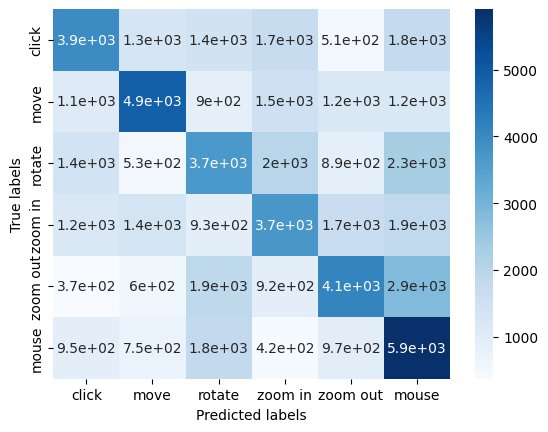

In [13]:
model = cnn_model_3(240,640,1)

test_dataset = get_dataset("C:\\testing", False, 32, "grayscale")

model.load_weights(f"C:\\modelTraining\\imageBased-torre\\cnn3\\6\\test.ckpt")

test_images = test_dataset.map(lambda x,y: x)
test_labels = test_dataset.map(lambda x,y: y)

predictions = model.predict(test_dataset)

true_labels = []
for _, labels in test_dataset:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())

true_labels = np.array(true_labels)
predicted_labels = np.argmax(predictions, axis=1)


cm = tf.math.confusion_matrix(true_labels, predicted_labels)

sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['click', 'move', 'rotate', 'zoom in', 'zoom out', 'mouse'], yticklabels= ['click', 'move', 'rotate', 'zoom in', 'zoom out', 'mouse'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

## Save dos modelos

In [8]:
model = cnn_model_3(240,640,1)

model.load_weights(f"C:\\modelTraining\\imageBased-torre\\cnn3\\6\\test.ckpt")

model.save("protobuf-models/cnn3-fold6")

c:\modelTraining\.venv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


INFO:tensorflow:Assets written to: protobuf-models/cnn3-fold6\assets


INFO:tensorflow:Assets written to: protobuf-models/cnn3-fold6\assets


# VGG16 Archi

In [14]:
def vgg16():
    # Chamar o VGG16 com o trainable a Falso
    vgg_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights="imagenet")
    vgg_model.trainable=False

    # Mudar a camada de input
    inputs = tf.keras.Input(shape=(224,224,3))
    x = vgg_model(inputs, training=False)

    # Criar as duas camadas para previsão
    fc1 = tf.keras.layers.Dense(250)(x)
    fc2 = tf.keras.layers.Dense(200)(fc1)
    fc3 = tf.keras.layers.Dense(100)(fc2)
    fc4 = tf.keras.layers.Dense(50)(fc3)
    x = tf.keras.layers.Flatten()(fc4)
    output = tf.keras.layers.Dense(6, activation='softmax')(x)

    # Compilação do modelo
    model = tf.keras.Model(inputs, output)
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss = "categorical_crossentropy",
                  metrics = ["accuracy"])
    
    return model

def prepare_callbacks(directory):
    checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=directory,
                               monitor = 'val_accuracy',
                               verbose=1,
                               save_weights_only=True,
                               save_best_only=True)


    earlyStopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta = 0.0001, patience = 15, verbose = 1)

    reduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.000000001, verbose = 1)

    return [checkpointer, earlyStopper, reduceLR]

## Loop de treino

In [16]:
all_voluntairs = [3, 6, 4, 5, 7, 9, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24]
history_array_vgg = []
result_array_vgg = []
current_fold = 0
AUTOTUNE = tf.data.AUTOTUNE

layer = tf.keras.layers.Resizing(224,224, crop_to_aspect_ratio=True)

# Get the test dataset
test_dataset_vgg16 = get_dataset("/home/birdlab/Documents/bruno-repo/testing", False, 32, "rgb")
test_dataset_vgg16 = test_dataset_vgg16.map(lambda x,y: (layer(x), y))

for fold in val_folds:
    # Crio o dataset de validação
    create_dataset("validation", fold)
    val_dataset_vgg16 = get_dataset("/home/birdlab/Documents/bruno-repo/validation", False, batch_size=32, color_mode="rgb")
    
    # Determino os indices de treino
    train_index = [x for x in all_voluntairs if x not in fold]

    # Crio o dataset de treino
    create_dataset("training", train_index)
    train_dataset_vgg16 = get_dataset("/home/birdlab/Documents/bruno-repo/training", True, batch_size=32, color_mode="rgb")
    
    # Resize das imagens porque o vgg não aceita tão grandes
    train_dataset_vgg16 = train_dataset_vgg16.map(lambda x,y: (layer(x),y))
    val_dataset_vgg16 = val_dataset_vgg16.map(lambda x,y: (layer(x),y))

    # Instancio um modelo novo
    model = vgg16()

    # Preparo os callback do novo modelo
    callbacks = prepare_callbacks(f"vgg16/{current_fold}/test.ckpt")

    # Treino o modelo e guardo a historia num array
    history = model.fit(train_dataset_vgg16, validation_data=val_dataset_vgg16, epochs=20, callbacks=callbacks)
    history_array_vgg.append(history)

    result = model.evaluate(test_dataset_vgg16)
    result_array_vgg.append(result)
    
    # Elimino as pastas criadas
    delete_folder("/home/birdlab/Documents/bruno-repo/validation")
    delete_folder("/home/birdlab/Documents/bruno-repo/training")

    current_fold += 1

16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16214
D:\BackupProtocoloRecolha\05 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\BackupProtocoloRecolha\13 was copied.
16371
D:\Back

ValueError: in user code:

    File "c:\modelTraining\.venv\lib\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "c:\modelTraining\.venv\lib\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\modelTraining\.venv\lib\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "c:\modelTraining\.venv\lib\site-packages\keras\engine\training.py", line 1665, in test_step
        y_pred = self(x, training=False)
    File "c:\modelTraining\.venv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\modelTraining\.venv\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_2" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 240, 640, 1)


## Resultado dos dados de teste para todos os modelos

In [18]:
layer = tf.keras.layers.Resizing(224,224, crop_to_aspect_ratio=True)

test_dataset = get_dataset("C:\\testing", False, 32, "rgb")
test_dataset = test_dataset.map(lambda x,y: (layer(x), y))

for i in range(9):
    model = vgg16()

    model.load_weights(f"C:\\modelTraining\\pre-processing\\imageBased-torre\\vgg16\\{i}\\test.ckpt")

    model.evaluate(test_dataset)

Found 64566 files belonging to 6 classes.
2018/2018 [==============================] - 756s 374ms/step - loss: 586.6041 - accuracy: 0.6511


## Matriz de confusão para um modelo em específico

Found 64566 files belonging to 6 classes.
2018/2018 [==============================] - 801s 394ms/step


Text(50.722222222222214, 0.5, 'True labels')

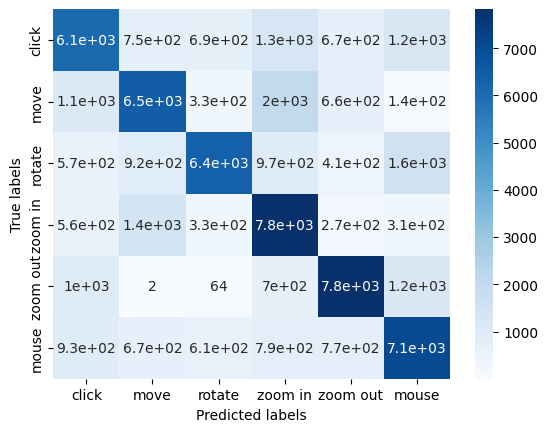

In [15]:
layer = tf.keras.layers.Resizing(224,224, crop_to_aspect_ratio=True)

model = vgg16()

test_dataset = get_dataset("C:\\testing", False, 32, "rgb")
test_dataset = test_dataset.map(lambda x,y: (layer(x), y))

model.load_weights(f"C:\\modelTraining\\imageBased-torre\\vgg16\\6\\test.ckpt")

test_images = test_dataset.map(lambda x,y: x)
test_labels = test_dataset.map(lambda x,y: y)

predictions = model.predict(test_dataset)

true_labels = []
for _, labels in test_dataset:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())

true_labels = np.array(true_labels)
predicted_labels = np.argmax(predictions, axis=1)


cm = tf.math.confusion_matrix(true_labels, predicted_labels)

sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['click', 'move', 'rotate', 'zoom in', 'zoom out', 'mouse'], yticklabels= ['click', 'move', 'rotate', 'zoom in', 'zoom out', 'mouse'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

## Save do modelo

In [11]:
model = vgg16()

model.load_weights(f"C:\\modelTraining\\imageBased-torre\\vgg16\\6\\test.ckpt")
model.save("protobuf-models/vgg16-sem-augmentation-fold6")

INFO:tensorflow:Assets written to: protobuf-models/vgg16-sem-augmentation-fold6\assets


INFO:tensorflow:Assets written to: protobuf-models/vgg16-sem-augmentation-fold6\assets


# RestNet50

In [16]:
def resnet50():
    # Chamar a ResNet50 com o trainable a Falso
    resnet_model = tf.keras.applications.resnet.ResNet50(include_top=False, weights="imagenet")
    resnet_model.trainable=False

    # Mudar a camada de input
    inputs = tf.keras.Input(shape=(224,224,3))
    x = resnet_model(inputs, training=False)

    # Criar as duas camadas para previsão
    fc1 = tf.keras.layers.Dense(250)(x)
    fc2 = tf.keras.layers.Dense(200)(fc1)
    fc3 = tf.keras.layers.Dense(100)(fc2)
    fc4 = tf.keras.layers.Dense(50)(fc3)
    x = tf.keras.layers.Flatten()(fc4)
    output = tf.keras.layers.Dense(6, activation='softmax')(x)

    # Compilação do modelo
    model = tf.keras.Model(inputs, output)
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss = "categorical_crossentropy",
                  metrics = ["accuracy"])
    
    return model

def prepare_callbacks(directory):
    checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=directory,
                               monitor = 'val_accuracy',
                               verbose=1,
                               save_weights_only=True,
                               save_best_only=True)


    earlyStopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta = 0.0001, patience = 15, verbose = 1)

    reduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.000000001, verbose = 1)

    return [checkpointer, earlyStopper, reduceLR]

## Loop de treino

In [ ]:
all_voluntairs = [3, 6, 4, 5, 7, 9, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24]
history_array_resnet = []
result_array_resnet = []
current_fold = 0
AUTOTUNE = tf.data.AUTOTUNE

layer = tf.keras.layers.Resizing(224,224, crop_to_aspect_ratio=True)

# Get the test dataset
test_dataset = get_dataset("/home/birdlab/Documents/bruno-repo/testing", False, 32, "rgb")
test_dataset = test_dataset.map(lambda x,y: (layer(x), y))

for fold in val_folds:
    # Crio o dataset de validação
    create_dataset("validation", fold)
    val_dataset = get_dataset("/home/birdlab/Documents/bruno-repo/validation", False, batch_size=None, color_mode="rgb")
    
    # Determino os indices de treino
    train_index = [x for x in all_voluntairs if x not in fold]

    # Crio o dataset de treino
    create_dataset("training", train_index)
    train_dataset = get_dataset("/home/birdlab/Documents/bruno-repo/training", True, batch_size=None, color_mode="rgb")
    
    # Resize das imagens porque o vgg não aceita tão grandes
    train_dataset = train_dataset.map(lambda x,y: (layer(x),y))
    val_dataset = val_dataset.map(lambda x,y: (layer(x),y))

    # Instancio um modelo novo
    model = resnet50()

    # Preparo os callback do novo modelo
    callbacks = prepare_callbacks(f"resnet50/{current_fold}/test.ckpt")

    # Treino o modelo e guardo a historia num array
    history = model.fit(train_dataset, validation_data=val_dataset, epochs=20, callbacks=callbacks)
    history_array_resnet.append(history)

    result = model.evaluate(test_dataset)
    result_array_resnet.append(result)
    
    # Elimino as pastas criadas
    delete_folder("/home/birdlab/Documents/bruno-repo/validation")
    delete_folder("/home/birdlab/Documents/bruno-repo/training")

    current_fold += 1

## Resultado dos dados de teste para todos os modelos

In [20]:
for i in range(9):
    model = resnet50()

    model.load_weights(f"C:\\modelTraining\\pre-processing\\imageBased-torre\\resnet50\\{i}\\test.ckpt")

    model.evaluate(test_dataset)

2018/2018 [==============================] - 565s 279ms/step - loss: 2030.5090 - accuracy: 0.5945


## Matriz de confusão para um modelo em específico

Found 64566 files belonging to 6 classes.
2018/2018 [==============================] - 565s 278ms/step


Text(50.722222222222214, 0.5, 'True labels')

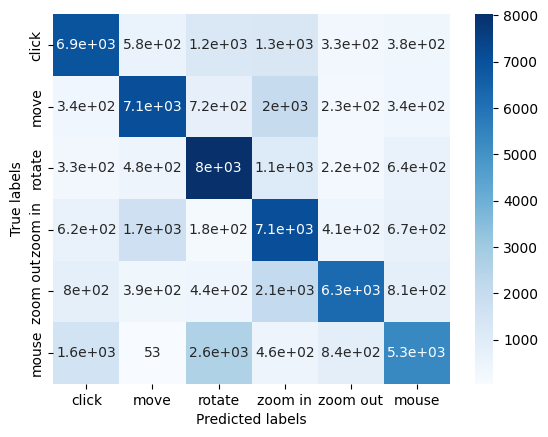

In [17]:
layer = tf.keras.layers.Resizing(224,224, crop_to_aspect_ratio=True)

model = resnet50()

test_dataset = get_dataset("C:\\testing", False, 32, "rgb")
test_dataset = test_dataset.map(lambda x,y: (layer(x), y))

model.load_weights(f"C:\\modelTraining\\imageBased-torre\\resnet50\\6\\test.ckpt")

test_images = test_dataset.map(lambda x,y: x)
test_labels = test_dataset.map(lambda x,y: y)

predictions = model.predict(test_dataset)

true_labels = []
for _, labels in test_dataset:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())

true_labels = np.array(true_labels)
predicted_labels = np.argmax(predictions, axis=1)


cm = tf.math.confusion_matrix(true_labels, predicted_labels)

sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['click', 'move', 'rotate', 'zoom in', 'zoom out', 'mouse'], yticklabels= ['click', 'move', 'rotate', 'zoom in', 'zoom out', 'mouse'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

## Save do modelo

In [12]:
model = resnet50()

model.load_weights(f"C:\\modelTraining\\imageBased-torre\\resnet50\\6\\test.ckpt")
model.save("protobuf-models/resnet50-sem-augmentation-fold6")

INFO:tensorflow:Assets written to: protobuf-models/resnet50-sem-augmentation-fold6\assets


INFO:tensorflow:Assets written to: protobuf-models/resnet50-sem-augmentation-fold6\assets
